In [2]:
import csv
import numpy as np
import pandas as pd

In [3]:
# reading in the csv file as a new pandas dataframe called roi_df
#use pd.read_csv("the path to the csv file on ur computer")
Multimeas = pd.read_csv("C:/Users/chris/Desktop/projects/optometry/jupyter/opt.csv")

In [4]:
roi_df = Multimeas

In [5]:
roi_df.hist(column="DAPI", bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001604DE52C50>]],
      dtype=object)

In [6]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from pylab import *

In [7]:
def gauss(x,mu,sigma,A):
    return A*exp(-(x-mu)**2/2/sigma**2)

def bimodal(x,mu1,sigma1,A1,mu2,sigma2,A2):
    return gauss(x,mu1,sigma1,A1)+gauss(x,mu2,sigma2,A2)

In [8]:
DAPI = np.asarray(roi_df["DAPI"].tolist())
DAPI

array([ 369.136,  988.403, 2316.406, ..., 5662.223, 5675.363, 5656.707])

(array([1.08e+02, 1.60e+03, 7.56e+02, 8.50e+01, 4.10e+01, 3.00e+01,
        1.70e+01, 1.70e+01, 1.40e+01, 9.00e+00, 1.40e+01, 2.30e+01,
        2.80e+01, 3.40e+01, 2.50e+01, 3.40e+01, 4.70e+01, 6.40e+01,
        6.00e+01, 9.30e+01, 8.80e+01, 1.05e+02, 1.48e+02, 1.36e+02,
        1.72e+02, 1.77e+02, 1.68e+02, 1.79e+02, 1.85e+02, 2.15e+02,
        2.15e+02, 2.17e+02, 2.08e+02, 2.12e+02, 2.13e+02, 2.27e+02,
        2.18e+02, 2.19e+02, 2.03e+02, 2.01e+02, 1.89e+02, 2.08e+02,
        2.04e+02, 1.80e+02, 1.95e+02, 1.61e+02, 1.57e+02, 1.44e+02,
        1.53e+02, 1.52e+02, 1.59e+02, 1.64e+02, 1.22e+02, 1.42e+02,
        1.05e+02, 1.06e+02, 9.70e+01, 1.05e+02, 1.19e+02, 8.60e+01,
        9.10e+01, 8.50e+01, 7.90e+01, 5.50e+01, 6.50e+01, 6.20e+01,
        6.90e+01, 3.90e+01, 5.10e+01, 3.70e+01, 3.50e+01, 4.40e+01,
        2.90e+01, 2.40e+01, 2.20e+01, 1.40e+01, 1.80e+01, 1.60e+01,
        1.50e+01, 1.10e+01, 8.00e+00, 1.00e+01, 7.00e+00, 4.00e+00,
        2.00e+00, 5.00e+00, 7.00e+00, 4.00e+00, 

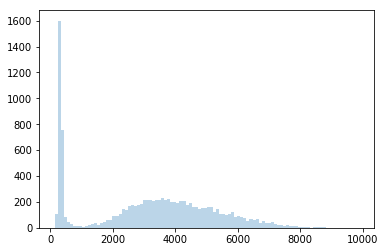

In [9]:
hist(DAPI,100,alpha=.3,label='data')

[ 315.49298567   52.2024768  1823.89770339 3893.83013665 1489.60833432
  212.87715992] 
 [ 1.17221578  1.29845101 37.35051651 33.89033281 34.42268729  4.19827902]


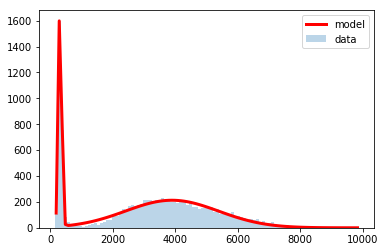

In [49]:
y,x,_=hist(DAPI,100,alpha=.3,label='data')

x=(x[1:]+x[:-1])/2 # for len(x)==len(y)

expected=(250,20,1600,3700,30,300)
params,cov=curve_fit(bimodal,x,y,expected)
sigma=sqrt(diag(cov))
plot(x,bimodal(x,*params),color='red',lw=3,label='model')
legend()
print(params,'\n',sigma)  

In [11]:
pd.DataFrame(data={'params':params,'sigma':sigma},index=bimodal.__code__.co_varnames[1:])

,params,sigma
mu1,315.492986,1.172216
sigma1,52.202477,1.298451
A1,1823.897703,37.350517
mu2,3893.830137,33.890333
sigma2,1489.608334,34.422687
A2,212.877160,4.198279


In [72]:
def bimodalGraph(col, table, expected=None): #change bins?
    '''Bimodal Graph for histogram of col from table with 100 bins.'''
    nparr = np.asarray(table[col].tolist())
    y,x,_=hist(DAPI,100,alpha=.3,label='data')
    x=(x[1:]+x[:-1])/2
    if expected is none:
        expected = getBimodalExpected(nparr, x, y)
    params,cov=curve_fit(bimodal,x,y,expected)
    sigma=sqrt(diag(cov))
    plot(x,bimodal(x,*params),color='red',lw=3,label='model')
    legend()
    print(params,'\n',sigma) 

def getBimodalExpected(nparr, x, y):
    #find where max occurs in the first half (0 - 100) (zero's peak, middle of first)
    maxloc = np.argmax(y[0:50])
    maxlocx = x[maxloc]
    ymax = np.max(y[0:50])
    
    #find min in the first half (end of first normal, start of second)
    miny = np.argmin(y[0:50])
    minx = x[miny]
    
    #find matching end location in the second half (end of second)
    endminx = x[50 + find_nearest(nparr[50:100], miny)]
    
    #find max after zero's peak times 4 (middle of second)
    maxlocsecond = maxloc * 4 + np.argmax(y[maxloc * 4 :100])
    ymaxsecond = np.max(y[maxloc * 4:100])
    maxlocsecondx = x[maxlocsecond]
    
    return (maxlocx,20,ymax,maxlocsecondx,30,ymaxsecond)

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [13]:
from scipy.signal import find_peaks

In [14]:
peaks, properties = find_peaks(DAPI, height=1600, prominence=1, width=2)

In [15]:
peaks

array([   14,    23,    30, ..., 10629, 10644, 10654], dtype=int64)

In [16]:
z = np.argmin(DAPI)

In [17]:
z

2423

In [18]:
for i in range(0,10000,1000):
    print(i, DAPI[i])

0 369.13599999999997
1000 308.79
2000 5197.66
3000 3488.0040000000004
4000 4272.312
5000 4586.266
6000 4304.465
7000 4356.179
8000 3410.7459999999996
9000 5621.738


In [19]:
x[np.argmin(y[0:50])]

1066.798145

In [20]:
DAPI[2423]

141.955

In [21]:
DAPI[92]

3535.842

In [22]:
y

array([1.08e+02, 1.60e+03, 7.56e+02, 8.50e+01, 4.10e+01, 3.00e+01,
       1.70e+01, 1.70e+01, 1.40e+01, 9.00e+00, 1.40e+01, 2.30e+01,
       2.80e+01, 3.40e+01, 2.50e+01, 3.40e+01, 4.70e+01, 6.40e+01,
       6.00e+01, 9.30e+01, 8.80e+01, 1.05e+02, 1.48e+02, 1.36e+02,
       1.72e+02, 1.77e+02, 1.68e+02, 1.79e+02, 1.85e+02, 2.15e+02,
       2.15e+02, 2.17e+02, 2.08e+02, 2.12e+02, 2.13e+02, 2.27e+02,
       2.18e+02, 2.19e+02, 2.03e+02, 2.01e+02, 1.89e+02, 2.08e+02,
       2.04e+02, 1.80e+02, 1.95e+02, 1.61e+02, 1.57e+02, 1.44e+02,
       1.53e+02, 1.52e+02, 1.59e+02, 1.64e+02, 1.22e+02, 1.42e+02,
       1.05e+02, 1.06e+02, 9.70e+01, 1.05e+02, 1.19e+02, 8.60e+01,
       9.10e+01, 8.50e+01, 7.90e+01, 5.50e+01, 6.50e+01, 6.20e+01,
       6.90e+01, 3.90e+01, 5.10e+01, 3.70e+01, 3.50e+01, 4.40e+01,
       2.90e+01, 2.40e+01, 2.20e+01, 1.40e+01, 1.80e+01, 1.60e+01,
       1.50e+01, 1.10e+01, 8.00e+00, 1.00e+01, 7.00e+00, 4.00e+00,
       2.00e+00, 5.00e+00, 7.00e+00, 4.00e+00, 4.00e+00, 2.00e

In [23]:
np.histogram(DAPI)

(array([2677,  422, 1573, 2133, 1743, 1205,  633,  228,   53,    5],
       dtype=int64),
 array([ 141.955 , 1115.4741, 2088.9932, 3062.5123, 4036.0314, 5009.5505,
        5983.0696, 6956.5887, 7930.1078, 8903.6269, 9877.146 ]))

In [24]:
miny = np.argmin(y[0:50])
minx = x[np.argmin(y[0:50])]
endx = find_nearest(np.asarray(roi_df["DAPI"].tolist())[50:100], miny)

In [25]:
endx

32

In [26]:
x[50+32]

8173.487575

In [29]:
minx

1066.798145

In [51]:
np.argmax(y[0:50])

1

In [44]:
x[np.max(y[0:50])]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [60]:
np.argmax(y[20:100])

15

In [54]:
x[50 + find_nearest(np.asarray(roi_df["DAPI"].tolist())[50:100], miny)]

8173.487575

In [68]:
maxloc = np.argmax(y[0:50])
print(maxloc, x[maxloc])

1 287.982865


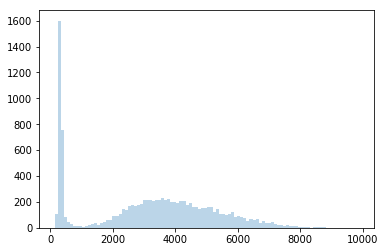

In [64]:
nparr = np.asarray(roi_df["DAPI"].tolist())
y,x,_=hist(DAPI,100,alpha=.3,label='data')
x=(x[1:]+x[:-1])/2

In [65]:
#find min in the first half (end of first normal, start of second)
miny = np.argmin(y[0:50])
minx = x[np.argmin(y[0:50])]
    
#find matching end location in the second half (end of second)
endminx = x[50 + find_nearest(nparr[50:100], miny)]
print(miny, minx, endminx)

9 1066.798145 8173.487575


In [67]:
maxlocsecond = x[maxloc * 4 + np.argmax(y[maxloc * 4 :100])]
print(maxlocsecond)

3597.947805


In [ ]:
(250,20,1600,3700,30,300)

In [69]:
np.max(y[0:50])

1600.0

In [70]:
np.max(y[maxloc * 4:100])

227.0